In [1]:
path = "../input/scene_classification/scene_classification/train/"

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 256

In [4]:
df = pd.read_csv('../input/scene_classification/scene_classification/train.csv')
df.head()

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [5]:
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0)

In [6]:
data_small = (ImageList.from_csv(path, csv_name = '../train.csv') 
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '../test')              
        .transform(tfms, size=128)
        .databunch(num_workers=0))

In [7]:
data_large = (ImageList.from_csv(path, csv_name = '../train.csv') 
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '../test')              
        .transform(tfms, size=256)
        .databunch(num_workers=0))

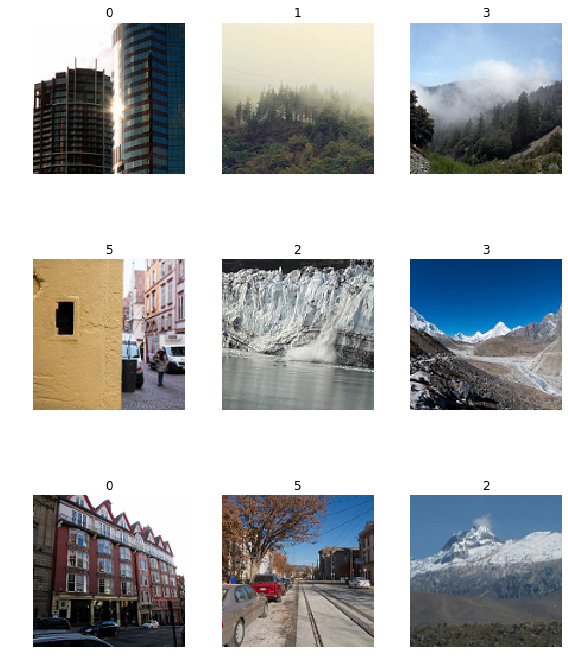

In [8]:
data_small.show_batch(rows=3, figsize=(8,10))

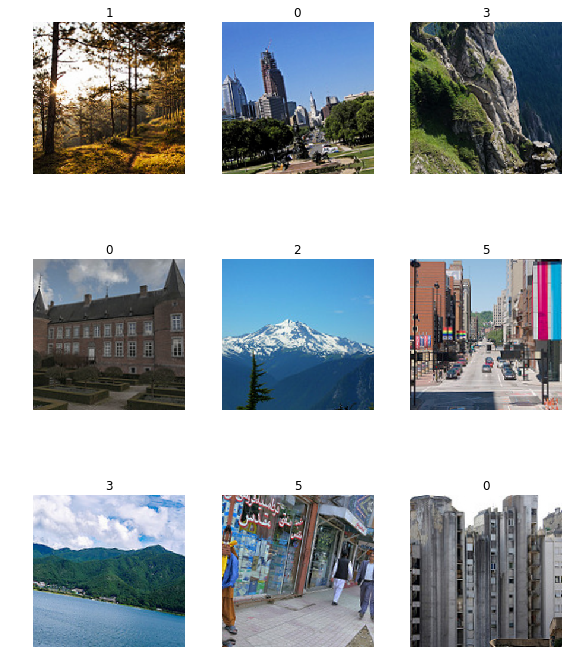

In [9]:
data_large.show_batch(rows=3, figsize=(8,10))

In [10]:
print(data_small.classes)
print(data_large.classes)

[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]


In [11]:
learn_34 = cnn_learner(data_small, models.resnet34, metrics=[error_rate, accuracy], model_dir="/tmp/model/")
learn_50 = cnn_learner(data_small, models.resnet50, metrics=[error_rate, accuracy], model_dir="/tmp/model/")
learn_101 = cnn_learner(data_small, models.resnet101, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 84762988.99it/s]
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 85509895.76it/s]
Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /tmp/.torch/models/resnet101-5d3b4d8f.pth
178728960it [00:02, 77340347.47it/s]


In [12]:
learn_34.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.508260,0.312226,0.110981,0.889019,01:36
1,0.355715,0.275560,0.093952,0.906048,01:09
2,0.310097,0.232229,0.080740,0.919260,01:10
3,0.260944,0.228711,0.079859,0.920141,01:10


In [13]:
interp = ClassificationInterpretation.from_learner(learn_34)

losses,idxs = interp.top_losses()

len(data_small.valid_ds)==len(losses)==len(idxs)

True

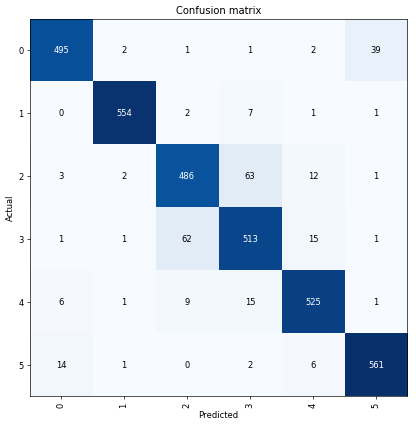

In [14]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

In [15]:
learn_34.save('/kaggle/working/resnet34-size128-stage1')

In [16]:
learn_34.data = data_large

In [17]:
learn_34.unfreeze()

In [18]:
learn_34.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


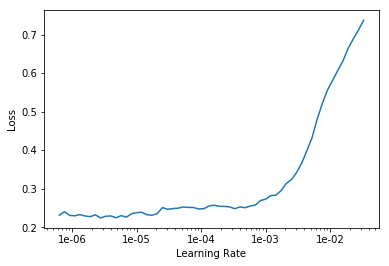

In [19]:
learn_34.recorder.plot()

In [20]:
learn_34.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.218926,0.169328,0.059601,0.940399,02:44
1,0.194824,0.160059,0.056371,0.943629,02:43
2,0.168009,0.156312,0.056078,0.943922,02:43


In [21]:
learn_34.save('/kaggle/working/resnet34-size256-stage1')

**ResNet 50**

In [22]:
learn_50.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.403120,0.313275,0.107164,0.892836,01:21
1,0.324939,0.243761,0.090722,0.909278,01:17
2,0.253224,0.222629,0.079272,0.920728,01:18
3,0.192063,0.211233,0.078978,0.921022,01:19


In [23]:
interp = ClassificationInterpretation.from_learner(learn_50)

losses,idxs = interp.top_losses()

len(data_small.valid_ds)==len(losses)==len(idxs)

True

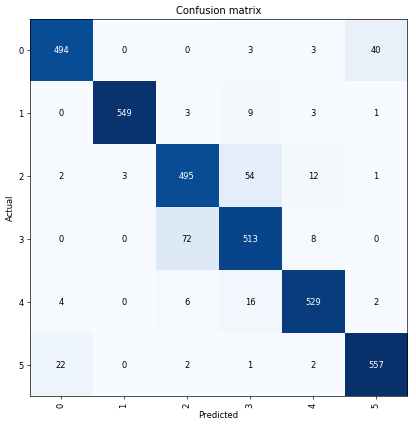

In [24]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

In [25]:
learn_50.save('/kaggle/working/resnet50-size128-stage1')

In [26]:
learn_50.data = data_large

In [27]:
learn_50.unfreeze()

In [28]:
learn_50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


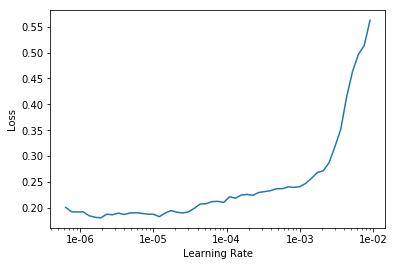

In [29]:
learn_50.recorder.plot()

In [30]:
learn_50.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.201345,0.157557,0.059601,0.940399,03:31
1,0.162663,0.151500,0.055197,0.944803,03:29
2,0.147747,0.149648,0.056078,0.943922,03:29


In [31]:
learn_50.save('/kaggle/working/resnet50-size256-stage1')

**ResNet 101**

In [32]:
learn_101.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.399936,0.268784,0.099530,0.900470,01:31
1,0.298211,0.218777,0.076336,0.923664,01:31
2,0.211980,0.191877,0.064298,0.935702,01:32
3,0.184150,0.188352,0.064592,0.935408,01:31


In [33]:
interp = ClassificationInterpretation.from_learner(learn_101)

losses,idxs = interp.top_losses()

len(data_small.valid_ds)==len(losses)==len(idxs)

True

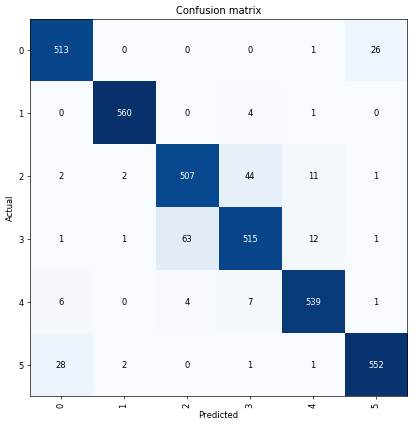

In [34]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

In [35]:
learn_101.save('/kaggle/working/resnet101-size128-stage1')

In [36]:
learn_101.data = data_large

In [37]:
learn_101.unfreeze()

In [38]:
learn_101.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


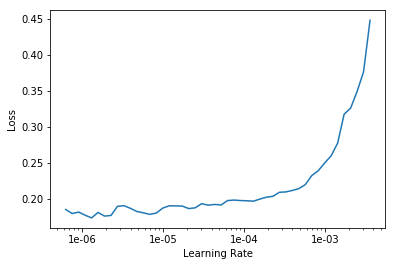

In [39]:
learn_101.recorder.plot()

In [40]:
learn_101.fit_one_cycle(3, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.190570,0.157190,0.056078,0.943922,04:26
1,0.152036,0.148268,0.053142,0.946858,04:26
2,0.121270,0.148669,0.053142,0.946858,04:24


In [41]:
learn_101.save('/kaggle/working/resnet101-size256-stage1')